In [32]:
from osgeo import gdal
import os
import xarray as xr
import cmaps
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
from cnmaps import get_adm_maps, draw_maps
import geopandas as gpd

通过os调用系统命令转换.tif为.nc

In [ ]:
os.system('gdalwarp gdal_test/pop1990.tif gdal_test\pop1990.nc -t_srs "+proj=longlat +ellps=WGS84"')

读取转换后的nc文件，将原始文件中的变量名从Band1修改为pop，pop表示人口密度

In [19]:

def read_data(file):
    ds = xr.open_dataset(file)
    return ds
ds = read_data('gdal_test/pop1990.nc')
ds = ds.rename({'Band1':'pop'})
ds

<xarray.Dataset> Size: 197MB
Dimensions:  (lat: 5380, lon: 9159)
Coordinates:
  * lat      (lat) float64 43kB 2.078 2.089 2.099 2.109 ... 56.78 56.79 56.8
  * lon      (lon) float64 73kB 57.49 57.5 57.51 57.52 ... 150.6 150.6 150.7
Data variables:
    pop      (lat, lon) float32 197MB ...
    crs      |S1 1B ...
Attributes:
    Conventions:         CF-1.5
    GDAL:                GDAL 3.9.0, released 2024/05/07
    history:             Wed Sep 25 20:14:19 2024: GDAL Create( gdal_test\pop...
    GDAL_DataType:       Generic
    GDAL_AREA_OR_POINT:  Area

可以发现转换后的nc文件中已经包含了经纬度信息，下面绘制人口密度的空间分布图

In [23]:
lon = ds.lon[:]
lat = ds.lat[:]

In [24]:

def set_ax(ax):
    xstep,ystep = 10,5
    box = [np.min(lon),np.max(lon),np.min(lat),np.max(lat)]
    ax.set_xticks(np.linspace(box[0], box[1], xstep),crs=ccrs.PlateCarree())
    ax.set_yticks(np.linspace(box[2], box[3], ystep), crs=ccrs.PlateCarree())
    ax.xaxis.set_major_formatter(LongitudeFormatter())
    ax.yaxis.set_major_formatter(LatitudeFormatter())
    ax.xaxis.set_major_locator(mticker.MultipleLocator(10))
    ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
    ax.xaxis.set_minor_locator(mticker.AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(mticker.AutoMinorLocator(5))
    ax.spines[['right','left','top','bottom']].set_linewidth(1.5) 
    ax.spines[['right','left','top','bottom']].set_visible(True) 

In [40]:

# 获取省级行政区划地图数据
provinces = get_adm_maps(level='省')

# 创建 GeoDataFrame，并指定几何列
pro_gdf = gpd.GeoDataFrame(provinces,  crs="EPSG:4326")

# 计算几何中心点
centroids = pro_gdf.geometry.centroid

# 标签列表
labels = [
    '北京', '天津', '河北', '山西', '内蒙', '辽宁', '吉林', '黑龙江', '上海',
    '江苏', '浙江', '安徽', '福建', '江西', '山东', '河南', '湖北', '湖南',
    '广东', '广西', '海南', '重庆', '四川', '贵州', '云南', '西藏', '陕西',
    '甘肃', '青海', '宁夏', '新疆', '台湾'
]

d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons
C:\Users\jixianpu\AppData\Local\Temp\ipykernel_45644\118542108.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = pro_gdf.geometry.centroid


POINT (116.4126254785551 40.185627980321) 北京
POINT (117.3480122376073 39.28566310330579) 天津
POINT (116.14324825334022 39.54575504616268) 河北
POINT (112.289474734092 37.57235785367627) 山西
POINT (113.93675766422965 44.09797477632044) 内蒙
POINT (122.59483710104882 41.27593651723691) 辽宁
POINT (126.18825536801377 43.66821317740549) 吉林
POINT (127.75591236330766 47.86942319023268) 黑龙江
POINT (121.48454735029625 31.21291808268474) 上海
POINT (119.48896385384623 32.96583086601394) 江苏
POINT (120.13955696492482 29.18493492149229) 浙江
POINT (117.22619307688822 31.825844229762374) 安徽
POINT (118.0049322044819 26.054952309894464) 福建
POINT (115.72204456815219 27.61427036284928) 江西
POINT (118.17710719916441 36.36152859368374) 山东
POINT (113.61456820312048 33.88259845967939) 河南
POINT (112.27047721290315 30.976200388056267) 湖北
POINT (111.70897373816756 27.609264918844076) 湖南
POINT (113.41322653462713 23.30773104164141) 广东
POINT (108.78828075498612 23.821115271307406) 广西
POINT (110.30513299432357 17.865831352607

d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons
d:\anaconda\ANACONDA\envs\pji\Lib\site-packages\cnmaps\maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the

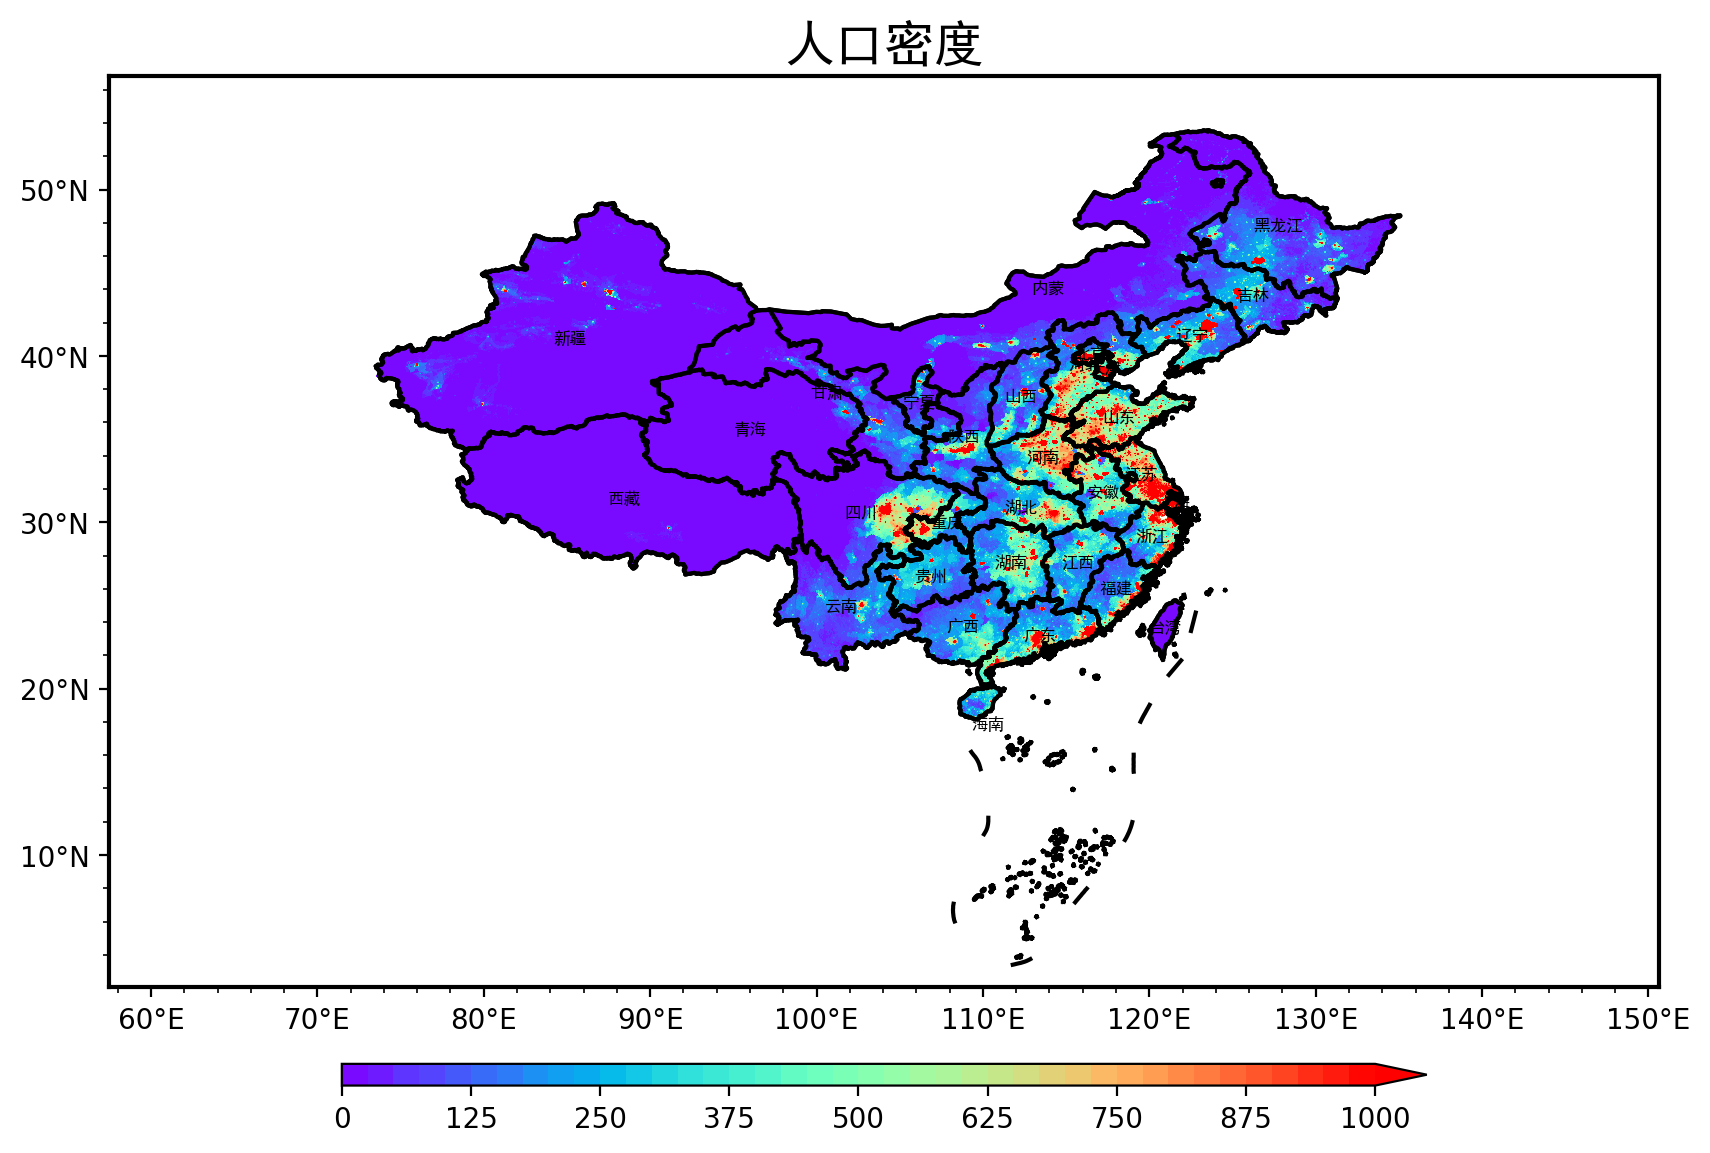

In [45]:

fig, axes = plt.subplots(nrows=1, 
                         ncols=1, dpi=200,
                         figsize=(10, 10), 
                         subplot_kw={'projection': ccrs.PlateCarree()})
# 绘制气候态平均值
ax1 = axes
# 绘制省份名称
for centroid, label in zip(centroids, labels):
    print(centroid, label)
    ax1.text(centroid.x, centroid.y, label, 
            transform=ccrs.PlateCarree(),
            fontproperties='SimHei', fontsize=6, ha='center', va='center')
set_ax(ax1)
cf1 = ax1.contourf(lon, lat,ds.pop, transform=ccrs.PlateCarree(), 
                   cmap=cmaps.MPL_rainbow,
                    levels=np.linspace(0,1000,41), 
                    extend='max'
                   )
ax1.set_title('人口密度', fontproperties='SimHei',size=18)  
draw_maps(get_adm_maps(level='国'), ax=ax1)
draw_maps(get_adm_maps(level='省'), ax=ax1)
plt.colorbar(cf1, 
             orientation='horizontal',
             extend='max',
             pad=0.05,aspect=50 ,shrink=0.7)
plt.show()